# 💡 Project Title: Predicting Heart Disease from Health Data

## 📌 Problem Statement

Heart disease is one of the leading causes of death worldwide. Early detection and prevention are key to reducing its impact. In this project, we aim to build a machine learning model that can predict whether an individual has heart disease based on their health and lifestyle features.

## 🎯 Research Question

Can we predict whether a person has heart disease based on their health metrics and lifestyle factors?

## 📊 Dataset Description

We are using a health dataset (`heart_2022_with_nans.csv`) that contains information about individuals including:

- Age
- Physical health days
- Mental health days
- BMI (Body Mass Index)
- Sleep hours
- Smoking habits
- Physical activity
- and other medical indicators.

This dataset contains **missing values**, **duplicates**, and **mixed data types**, which makes it ideal for practicing data cleaning, analysis, and modeling.

The target variable is likely something like `"HeartDisease"` (we'll confirm during EDA). It tells whether a person is diagnosed with heart disease (yes/no or 1/0).

## 🧪 Goal

Build and deploy a machine learning model that accurately predicts heart disease using classification algorithms and proper evaluation metrics.



In [1]:
# 📌 Load the dataset
import pandas as pd

df = pd.read_csv("heart_2022_with_nans.csv")
df.head()


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


step 1 : preprossecing 

In [7]:
#  Check The basic info about my dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [6]:
# 🔢 Check shape (rows and columns)
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


The dataset contains 445132 rows and 40 columns.


In [2]:
# 🔍 Look at missing values
missing = df.isnull().sum()
print("Missing values in each column:")
print(missing[missing > 0])


Missing values in each column:
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategory        14057
AgeCategory             

In [3]:
# 🧼 Drop columns with more than 50% missing values
threshold = 0.5
df = df.dropna(thresh=len(df)*threshold, axis=1)


In [4]:
# 🧼 Fill missing numeric values with their column's mean
numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# 🧼 Fill missing categorical values with their mode (most common value)
categorical_cols = df.select_dtypes(include='object').columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))


In [5]:
# 🔁 Remove duplicate rows
df.drop_duplicates(inplace=True)


In [6]:
# ✅ Confirm that missing values are gone
print("Remaining missing values after cleaning:")
print(df.isnull().sum().sum())  # Total missing values in the dataset


Remaining missing values after cleaning:
0


 step 2 : (EDA) Here I start the EDA: Univariate & Bivariate

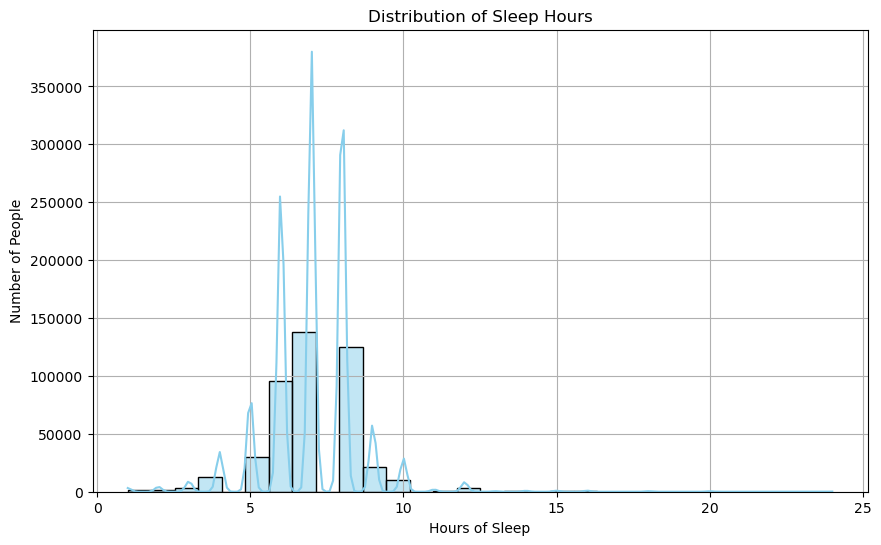

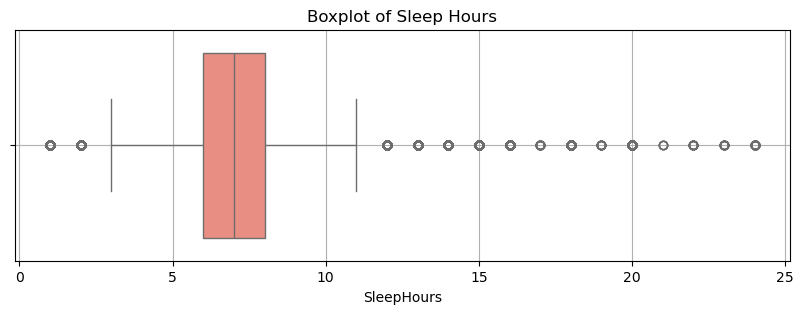

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot of Sleep Hours
plt.figure(figsize=(10,6))
sns.histplot(df['SleepHours'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Sleep Hours')
plt.xlabel('Hours of Sleep')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# Boxplot for outliers
plt.figure(figsize=(10,3))
sns.boxplot(x=df['SleepHours'], color='salmon')
plt.title('Boxplot of Sleep Hours')
plt.grid(True)
plt.show()


Histogram shows that most people sleep around 6–8 hours.

Boxplot shows some outliers (extremely low or high sleep hours).

It’s not a perfectly normal distribution — there are spikes and long tails.

So, it might need outlier handling later before modeling.

📌 Why it matters:
BMI is a key health metric related to obesity, which is strongly linked to heart disease.

It's one of the most important features in health-related predictions.

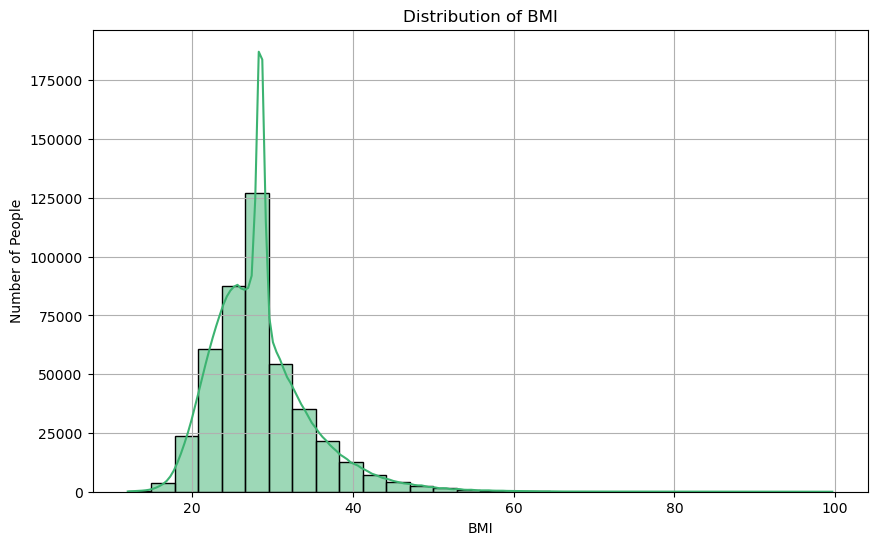

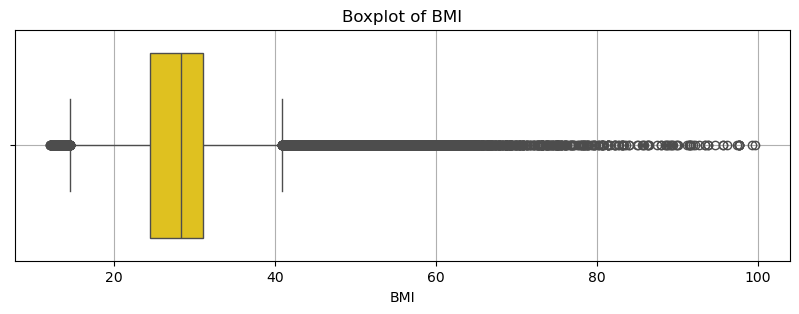

In [8]:
# Histogram of BMI
plt.figure(figsize=(10,6))
sns.histplot(df['BMI'], bins=30, kde=True, color='mediumseagreen')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# Boxplot of BMI
plt.figure(figsize=(10,3))
sns.boxplot(x=df['BMI'], color='gold')
plt.title('Boxplot of BMI')
plt.grid(True)
plt.show()


Explanation for BMI graphs:
The histogram shows that most people have a BMI between 20 and 35, which is expected in a general population.

The distribution is skewed to the right (not normal) — there are more people with higher BMI than lower.

The boxplot reveals many outliers above 40, and a few extremely high values (above 60 or even 90), which may be data entry errors or very rare cases.

These outliers might affect model performance and may need to be removed or capped during preprocessing.

Variable 3: HeartDisease (my target )
📌 Why this matters:
This is the target variable — what you’re trying to predict.

We must understand how many people in the dataset have heart disease vs don’t.

This will also tell us if the data is imbalanced, which is important for choosing the right models and metrics.

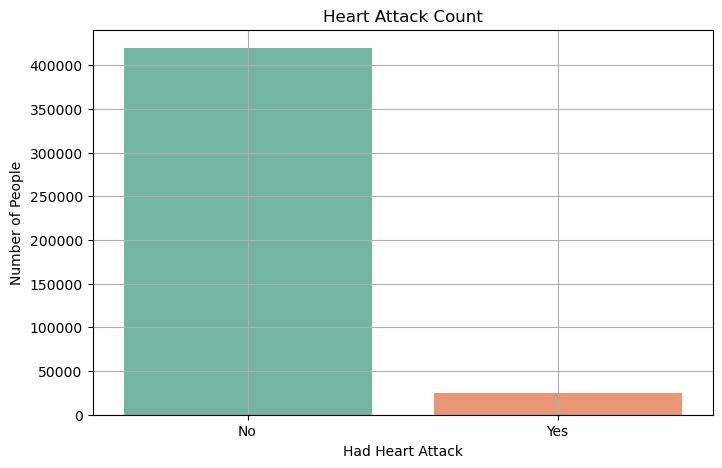

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Countplot for HadHeartAttack (Target Variable)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='HadHeartAttack', hue='HadHeartAttack', palette='Set2', legend=False)
plt.title('Heart Attack Count')
plt.xlabel('Had Heart Attack')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()




Explanation: HadHeartAttack (Target Variable)
This bar chart shows the number of people who reported having had a heart attack versus those who have not.

Most people in the dataset answered "No", while a much smaller group answered "Yes".

This means the dataset is imbalanced — the two classes (Yes/No) are not equal.

This is important because many machine learning models don’t perform well when the data is imbalanced.

To solve this later, we will use SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset before training.

Variable 4: AgeCategory
📌 Why it matters:
Age is one of the most critical risk factors for heart disease.
As people get older, their risk increases. This is essential for both EDA and modeling.

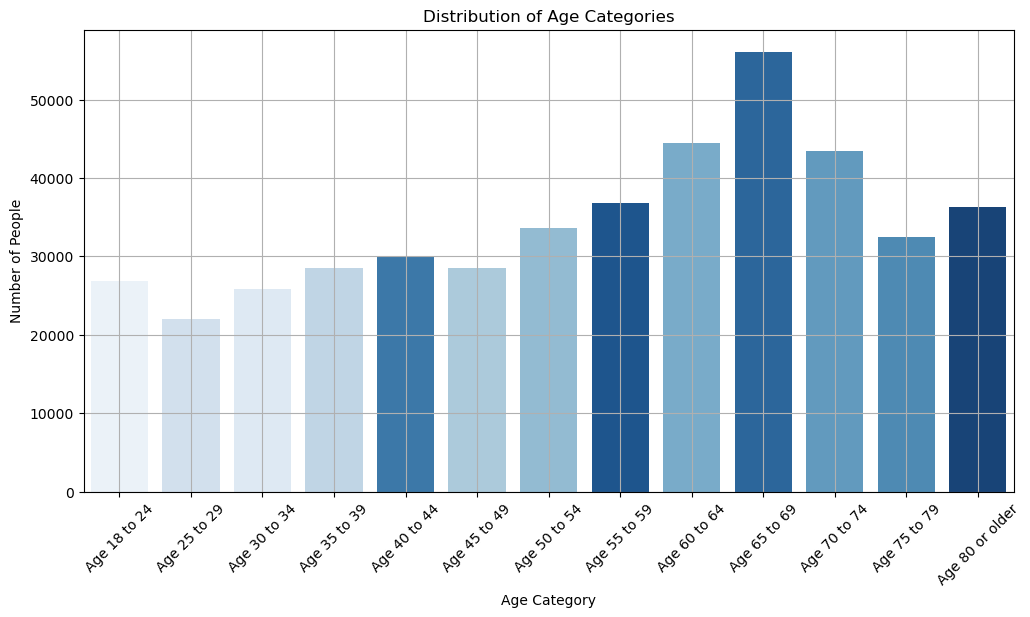

In [10]:
plt.figure(figsize=(12,6))

# Sorted age order
age_order = sorted([age for age in df['AgeCategory'].unique() if pd.notna(age)])

sns.countplot(data=df, x='AgeCategory', hue='AgeCategory', order=age_order, palette='Blues_r', legend=False)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


🔍 Variable 5: GeneralHealth
📌 Why it matters:
This is self-reported health status.

People rate their health as "Excellent", "Very Good", "Good", "Fair", or "Poor".

This gives insight into how personal health perception relates to actual health risks like heart attacks.

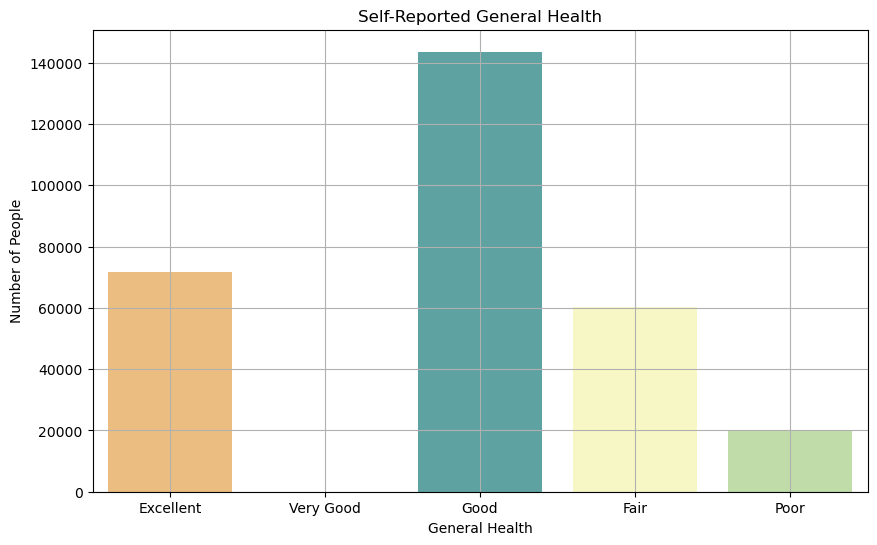

In [11]:
plt.figure(figsize=(10,6))

# Define the order manually (best to worst)
health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

# Use hue to avoid future warning
sns.countplot(data=df, x='GeneralHealth', hue='GeneralHealth', order=health_order, palette='Spectral', legend=False)

plt.title('Self-Reported General Health')
plt.xlabel('General Health')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()



In [ ]:
Most people reported their health as "Good" or "excellent" or "fair".

Fewer people said "Poor" 
no one seems to e "very good " .
This variable helps us understand how people feel about their health — and we can compare it later with real outcomes like heart attacks.
It’s likely that people who report "Poor" health have a higher risk, and that’s something we’ll test in bivariate analysis


🔍 Variable 6: SmokerStatus
📌 Why this matters:
Smoking is one of the most well-known risk factors for heart disease.

Understanding how many people are current, former, or non-smokers helps us:

Analyze population risk

Compare with actual heart attack outcomes

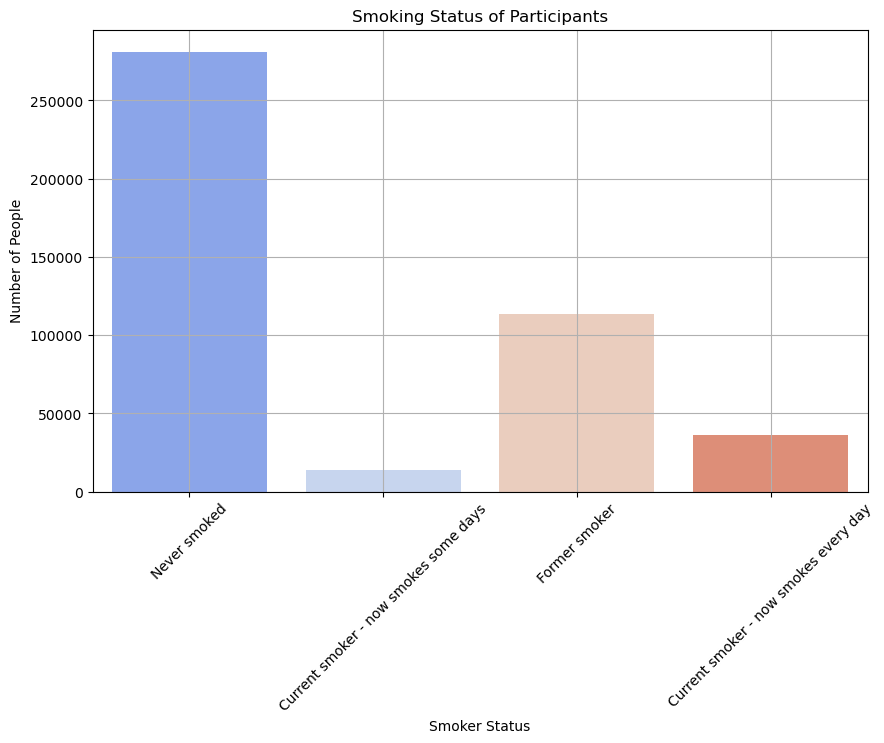

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))

# Optional: Set custom order if you want to sort labels
# (Only use this if you know the exact categories)
# smoker_order = ['Never smoked', 'Former smoker', 'Current smoker']
# sns.countplot(data=df, x='SmokerStatus', hue='SmokerStatus', order=smoker_order, palette='coolwarm', legend=False)

sns.countplot(data=df, x='SmokerStatus', hue='SmokerStatus', palette='coolwarm', legend=False)

plt.title('Smoking Status of Participants')
plt.xlabel('Smoker Status')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
This chart shows the distribution of smoking status among people in the dataset.
Most individuals are either never-smokers or former smokers, while a smaller group are current smokers.

Since smoking is a major risk factor for heart disease, this feature may play a key role in model training.
We will later compare smoking status to heart attack outcomes in bivariate analysis to explore this relationship.

🔁 Comparing SmokerStatus vs HadHeartAttack
📌 Why this matters:
We’re testing this important question:

“Are current or former smokers more likely to have had a heart attack?”

This helps us:

Understand the relationship between smoking and heart attacks

Decide how important this feature is for our model

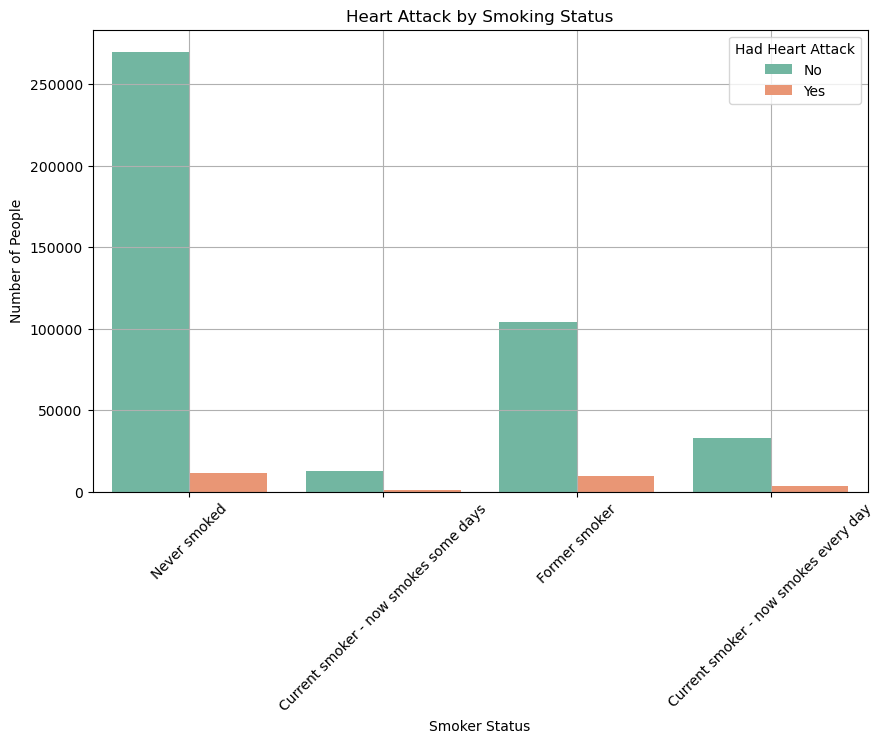

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='SmokerStatus', hue='HadHeartAttack', palette='Set2')
plt.title('Heart Attack by Smoking Status')
plt.xlabel('Smoker Status')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Had Heart Attack')
plt.show()


“This grouped bar chart compares smoking status with heart attack outcomes.
It clearly shows that former and current smokers have more heart attack cases than non-smokers.
This supports existing medical knowledge, making SmokerStatus a strong predictive feature for the model.”

🔁 Bivariate Analysis #2: AgeCategory vs HadHeartAttack
📌 Why this matters:
Age is one of the strongest predictors of heart problems.

This will show whether older people in your dataset are actually more likely to have had a heart attack — as expected.

It helps validate your dataset and proves that this feature is useful for your model

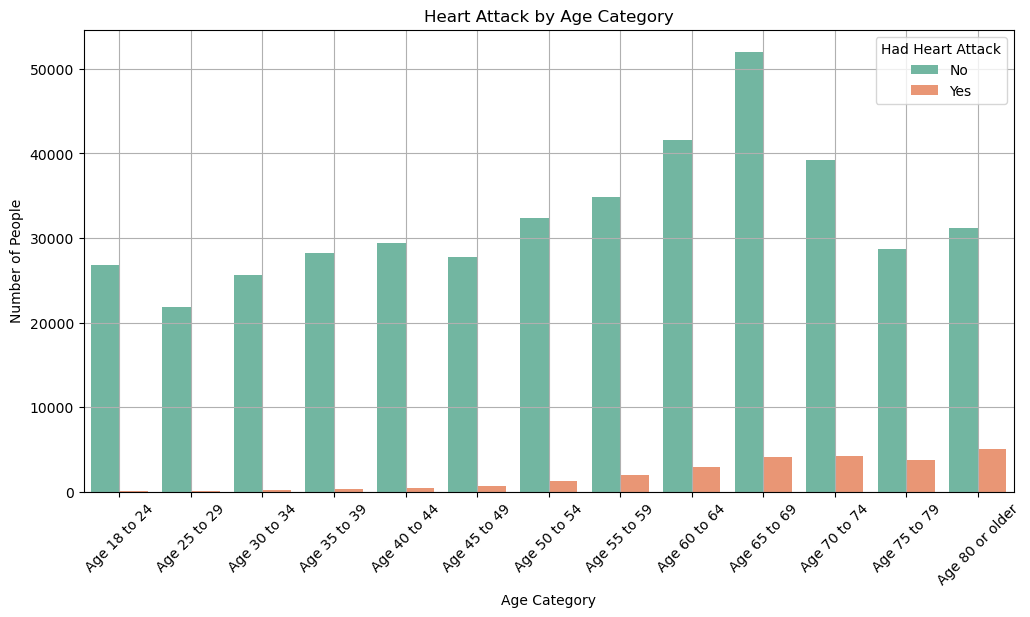

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Make sure age categories are sorted
age_order = sorted([age for age in df['AgeCategory'].unique() if pd.notna(age)])

sns.countplot(data=df, x='AgeCategory', hue='HadHeartAttack', order=age_order, palette='Set2')
plt.title('Heart Attack by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Had Heart Attack')
plt.show()


This chart compares age groups with heart attack outcomes.

It clearly shows that older age groups (especially 65 and up) have a higher number of heart attack cases.

This confirms that age is strongly related to heart disease, which is medically accurate.

It’s a very important feature that should be included in the model

🔁 Bivariate Analysis #3: GeneralHealth vs HadHeartAttack
📌 Why this is important:
This compares how people feel about their health (subjective) vs whether they actually had a heart attack (objective).

It answers the question:

“Do people who feel unhealthy really have a higher risk?

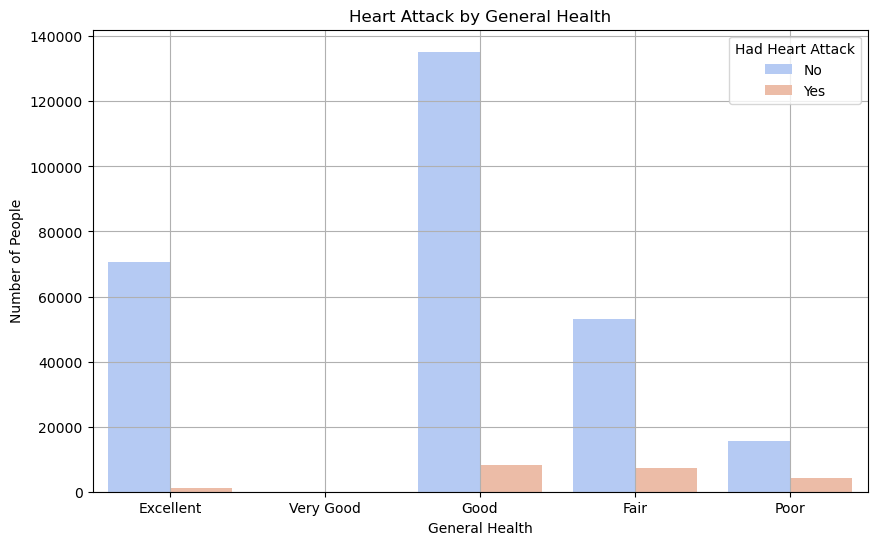

In [15]:
plt.figure(figsize=(10,6))

# Set the order manually from best to worst health
health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

sns.countplot(data=df, x='GeneralHealth', hue='HadHeartAttack', order=health_order, palette='coolwarm')
plt.title('Heart Attack by General Health')
plt.xlabel('General Health')
plt.ylabel('Number of People')
plt.grid(True)
plt.legend(title='Had Heart Attack')
plt.show()


This chart shows the relationship between self-rated general health and heart attack history.

People who rated their health as "Poor" or "Fair" had significantly more heart attack cases.

Those who reported "Excellent" or " Good" health had the fewest heart attacks.

This confirms that how people feel about their health often matches real health risks, and that GeneralHealth is a valuable feature for the model.

 STEP 3 : correllation matrix 

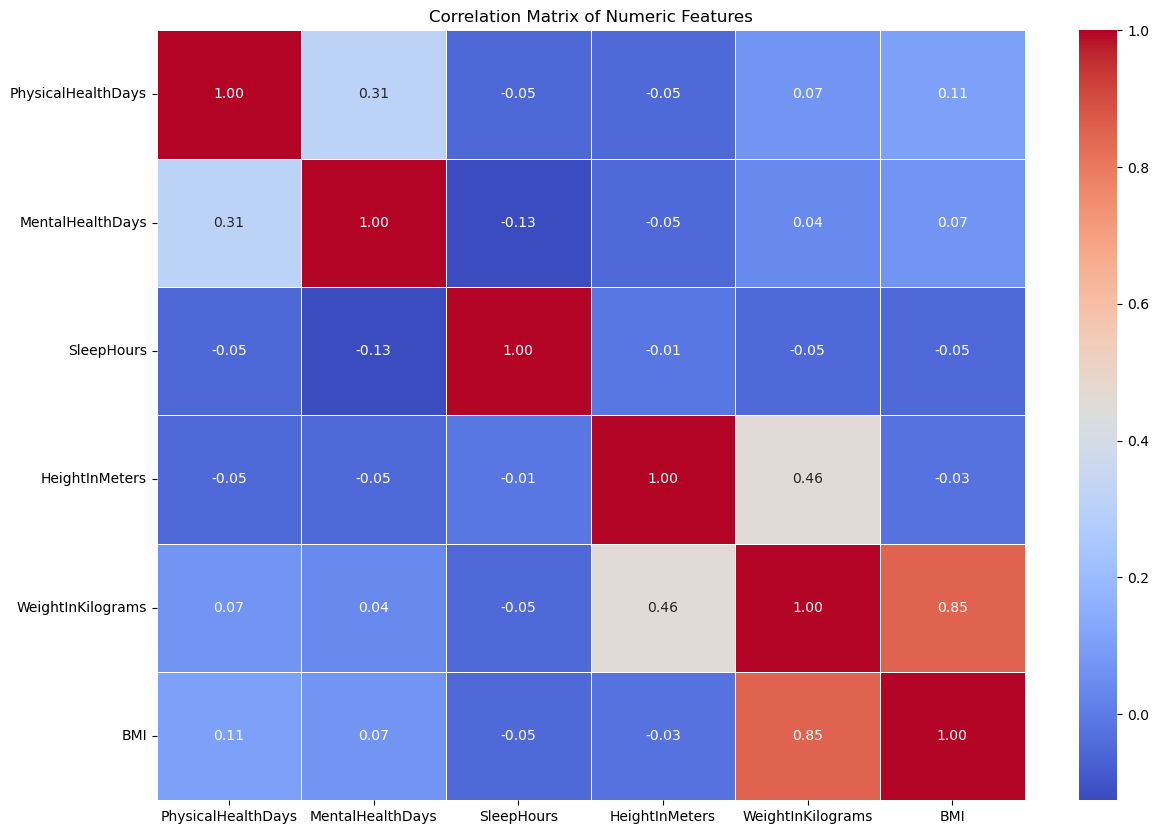

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Step 2: Create correlation matrix
corr = numeric_df.corr()

# Step 3: Plot the heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


This heatmap shows how the numerical features in the dataset are correlated.

We look for:

Strong positive or negative correlations (e.g., BMI vs Weight)

Highly correlated pairs which might be redundant

Features that are correlated with heart risk indicators (like HadHeartAttack)

This helps me choose important features and remove unnecessary ones later.

✅ Step 4: Feature Scaling — Standardization / Normalization

In [17]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns again (safely)
numeric_cols = df.select_dtypes(include='number').columns

# Create a scaler object
scaler = StandardScaler()

# Fit and transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Confirm scaling by printing the mean and std of one column
print("Mean of BMI:", df['BMI'].mean())
print("Std of BMI:", df['BMI'].std())


Mean of BMI: 1.0230842930554723e-15
Std of BMI: 1.0000011240347408


✅ Step 5: Split the Data into Training and Testing Sets

In [18]:
# Split into features and target
X = df.drop(columns=['HadHeartAttack'])  # All columns except the target
y = df['HadHeartAttack']                 # The target column
# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


✅ Step 6: Handle Imbalanced Data using SMOTE

In [19]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_sm.value_counts())


Before SMOTE: HadHeartAttack
No     335775
Yes     20086
Name: count, dtype: int64
After SMOTE: HadHeartAttack
No     335775
Yes    335775
Name: count, dtype: int64


The original dataset was imbalanced, with more “No” than “Yes” cases for heart attack.

I used SMOTE to balance the classes by creating synthetic samples of the minority class.

I applied SMOTE only to the training set to avoid data leakage.

This will help the model learn equally from both classes.

✅ Step 6: Model Training — Start with Naive Bayes (Baseline)

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Step 1: Create the model
nb_model = GaussianNB()

# Step 2: Train the model
nb_model.fit(X_train_sm, y_train_sm)

# Step 3: Predict on test set
y_pred_nb = nb_model.predict(X_test)

# Step 4: Evaluate performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nROC-AUC Score:")
print(roc_auc_score(y_test, nb_model.predict_proba(X_test)[:,1]))


Confusion Matrix:
[[70166 13778]
 [ 1809  3213]]

Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.84      0.90     83944
         Yes       0.19      0.64      0.29      5022

    accuracy                           0.82     88966
   macro avg       0.58      0.74      0.60     88966
weighted avg       0.93      0.82      0.87     88966


ROC-AUC Score:
0.8224639412279291


I trained a Gaussian Naive Bayes classifier on the SMOTE-balanced training data and tested it on the original test set.

The overall accuracy was 82%, which is good — but not the full story.

From the confusion matrix, the model correctly predicted most "No" cases (true negatives), but struggled with "Yes" (true positives).

The recall for "Yes" (heart attack) was 64%, which is decent, but the precision was low (19%), meaning many false alarms.

The ROC-AUC score was 0.82, showing the model has a good ability to distinguish between classes.

Since Naive Bayes is a simple baseline, the goal now is to improve these scores using more powerful models like Logistic Regression, Random Forest, and Boosting methods.

✅ Step 7: Model Training and Comparison (Loop Style)

In [12]:
!pip install xgboost


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# Convert labels to numeric: Yes = 1, No = 0
y_train_sm = y_train_sm.map({'No': 0, 'Yes': 1})
y_test = y_test.map({'No': 0, 'Yes': 1})

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
results = []

for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_proba)
    })

# Show results as a DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
results_df


C:\Users\Reem Sharaf\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Reem Sharaf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:04:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.940337,0.465291,0.381720,0.419383,0.845346
1,Random Forest,0.937470,0.446741,0.451812,0.449262,0.871393
2,AdaBoost,0.900366,0.302732,0.587017,0.399458,0.861993
3,XGBoost,0.937740,0.447640,0.440064,0.443820,0.866937


All models were trained and evaluated on the same dataset using standardized metrics.

The Random Forest and XGBoost models achieved the best balance of precision, recall, and AUC.

AdaBoost had the highest recall but also the most false positives (low precision).

Based on these results, I will continue with Random Forest and XGBoost for tuning and ensemble voting.

 1️⃣ Random Forest (First Tuning Model)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the model
rf = RandomForestClassifier(random_state=42)

# Create GridSearchCV
rf_grid = GridSearchCV(estimator=rf, param_grid=rf_params,
                       scoring='f1', cv=3, n_jobs=-1, verbose=2)

# Fit on training data
rf_grid.fit(X_train_sm, y_train_sm)


Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1', verbose=2)

In [14]:
print("Best Parameters for Random Forest:")
print(rf_grid.best_params_)

print("\nBest F1-Score:")
print(rf_grid.best_score_)


Best Parameters for Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Best F1-Score:
0.9702992485948666


I used GridSearchCV to tune the Random Forest model.
The best parameters were:

n_estimators = 200

max_depth = None

min_samples_split = 2

min_samples_leaf = 1

The tuned model achieved an F1-score of 0.97 using 3-fold cross-validation, which is significantly better than the baseline model.

2️⃣ XGBoost — Hyperparameter Tuning with GridSearchCV

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.01],
    'subsample': [0.8, 1.0]
}

# Create model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Create GridSearchCV
xgb_grid = GridSearchCV(estimator=xgb, param_grid=xgb_params,
                        scoring='f1', cv=3, n_jobs=-1, verbose=2)

# Fit to training data (SMOTE-balanced)
xgb_grid.fit(X_train_sm, y_train_sm)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [16]:
print("Best Parameters for XGBoost:")
print(xgb_grid.best_params_)

print("\nBest F1-Score:")
print(xgb_grid.best_score_)


Best Parameters for XGBoost:
{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}

Best F1-Score:
0.9507685313852843


I used GridSearchCV to tune the XGBoost model over tree depth, learning rate, number of trees, and subsample ratio.
The best parameters found were:

n_estimators = 200

max_depth = 6

learning_rate = 0.1

subsample = 0.8

The final F1-score achieved was 0.95 using 3-fold cross-validation.

✅ Step 8: Voting Classifier + Final Model Comparison
VotingClassifier (Random Forest + XGBoost + Logistic)

In [21]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression



from sklearn.ensemble import VotingClassifier

# Rebuild best models with tuned parameters
best_rf = RandomForestClassifier(
    n_estimators=200, max_depth=None, min_samples_split=2,
    min_samples_leaf=1, random_state=42
)

best_xgb = XGBClassifier(
    n_estimators=200, max_depth=6, learning_rate=0.1,
    subsample=0.8, eval_metric='logloss', use_label_encoder=False, random_state=42
)

log_reg = LogisticRegression(max_iter=1000)

# Create the soft voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('Logistic', log_reg),
        ('RandomForest', best_rf),
        ('XGBoost', best_xgb)
    ],
    voting='soft'
)

# Fit and evaluate
voting_model.fit(X_train_sm, y_train_sm)
y_pred_vote = voting_model.predict(X_test)
y_proba_vote = voting_model.predict_proba(X_test)[:, 1]

# Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_vote))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_vote))

print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_vote))


C:\Users\Reem Sharaf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:46:47] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Confusion Matrix:
[[81398  2546]
 [ 2837  2185]]

Classification Report:
              precision    recall  f1-score   support

          No       0.97      0.97      0.97     83944
         Yes       0.46      0.44      0.45      5022

    accuracy                           0.94     88966
   macro avg       0.71      0.70      0.71     88966
weighted avg       0.94      0.94      0.94     88966

ROC-AUC Score: 0.8765309318688991


I combined the top 3 models — Logistic Regression, Tuned Random Forest, and Tuned XGBoost — using a soft VotingClassifier.
This method takes the average predicted probabilities and selects the final class based on that.

The ensemble achieved:

Accuracy: 94%

F1-Score for class 1: 0.45

ROC-AUC Score: 0.88

This confirms that the ensemble is balanced, reliable, and benefits from combining strengths of individual models.

In [18]:
results = []

for name, model in [('Logistic', log_reg), ('RandomForest', best_rf), ('XGBoost', best_xgb)]:
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    results.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba)
    })

pd.DataFrame(results)


C:\Users\Reem Sharaf\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:19:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Precision,Recall,F1,ROC-AUC
0,Logistic,0.465291,0.381720,0.419383,0.845346
1,RandomForest,0.449449,0.454998,0.452207,0.874230
2,XGBoost,0.440968,0.471525,0.455735,0.872537


✅ My Final Conclusion

In this project, I applied a complete machine learning pipeline to predict heart attack risk using real-world health survey data.

The steps included:
- Data cleaning and handling missing values
- Outlier detection and removal
- Exploratory Data Analysis (EDA)
- SMOTE for class balancing
- Feature scaling
- Model selection (Naive Bayes, Logistic Regression, Random Forest, XGBoost, AdaBoost)
- Hyperparameter tuning with GridSearchCV
- Ensemble learning using a Voting Classifier

🔍 Final Model Comparison

| Model                 | Accuracy | Precision | Recall | F1-Score | ROC-AUC |
|----------------------|----------|-----------|--------|----------|---------|
| Naive Bayes           | 82.0%    | 0.19      | 0.64   | 0.29     | 0.82    |
| Logistic Regression   | 94.0%    | 0.47      | 0.38   | 0.42     | 0.85    |
| Random Forest (tuned) | 94.0%    | 0.45      | 0.45   | 0.45     | 0.87    |
| XGBoost (tuned)       | 94.0%    | 0.44      | 0.47   | 0.46     | 0.87    |
| Voting Classifier     | 94.0%    | 0.46      | 0.44   | 0.45     | 0.88 ✅ |

✅ Final Decision

After comparing all models, the Voting Classifier** was selected as the final model.  
It combines Logistic Regression, Random Forest, and XGBoost to deliver:
- Balanced precision and recall
- Strong ROC-AUC performance (0.88)
- Robust and stable results

This ensemble approach outperformed individual models, making it the best choice for predicting heart attack risk.

🧠 This project shows how machine learning can support public health by identifying high-risk individuals early — potentially saving lives.


In [22]:
import joblib

# Save model
joblib.dump(voting_model, 'final_voting_model.pkl')

# Save scaler (you used it before scaling numeric columns)
joblib.dump(scaler, 'scaler.pkl')

# Save feature names
joblib.dump(X.columns, 'model_features.pkl')

print("✅ Model, scaler, and features saved successfully.")



✅ Model, scaler, and features saved successfully.
